# Problem 1

In [29]:
import numpy as np
import scipy

x = np.asarray([[0, 3, 1], [1, 3, 1], [0, 1, 1], [1, 1, 1]])
y = np.asarray([1, 1, 0, 0])
w = np.asarray([-2, 1, 0])
L = .07
A = np.asarray([[2*L, 0, 0], [0, 2*L, 0], [0, 0, 0]])
s = scipy.special.expit(x.dot(w.T))


print("s0", s)
omega = np.diag([s[i]*(1-s[i]) for i in range(4)])
#Iteration 1
b = (-2*L*w + x.T.dot(y-s))
a = A + x.T.dot(omega).dot(x)
e = np.linalg.solve(a, b)
w = w + e
print("w1", w)
s = scipy.special.expit(x.dot(w.T))
print("s1", s)
omega = np.diag([s[i]*(1-s[i]) for i in range(4)])
#Iteration 1
b = (-2*L*w + x.T.dot(y-s))
a = A + x.T.dot(omega).dot(x)
e = np.linalg.solve(a, b)
w = w + e
print("w2", w)

s0 [ 0.95257413  0.73105858  0.73105858  0.26894142]
w1 [ 0.06867758  2.10887732 -4.31088359]
s1 [ 0.88244067  0.88938022  0.09957047  0.1058994 ]
w2 [-1.32024752  0.00735306  2.30315164]


# Problem 4, Logistic Regression


In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

def get_s(w, data):
    return scipy.special.expit(data.dot(w))

#Takes in a feature vectore and classifies it as 0 or 1    
def classify(x, w):
    val = scipy.special.expit(w.dot(x))
    if val > .5:
        return 1
    return 0

def Loss(predicted, true):
    if predicted == 1:
        predicted = 1 - 1e-10
    elif predicted == 0:
        predicted = 1e-10
        
    return true * np.log(predicted) + (1-true)*np.log(1-predicted)

def Cost(values, labels, w, lamb):
    value = sum(Loss(scipy.special.expit(values[i].dot(w)), labels[i]) for i in range(len(values)))
    return lamb * np.power(np.linalg.norm(w), 2) - value

def Score(Vals, Labels, w):
    total = len(Vals)
    correct = 0
    for i in range(total):
        if classify(Vals[i], w) == Labels[i]:
            correct += 1
    return correct / total

def Train(iterations, epsilon, lamb, data, labels):
    w = np.zeros(12)
    for i in range(iterations):
        s = get_s(w, data)
        w = w + epsilon*(data.T.dot(labels - s) - 2*lamb*w)
    return w
        

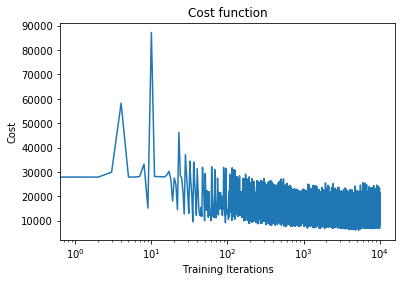

In [69]:
#Load the data and split it up into test and train sets
epsilon = .01
lamb = .00001

data = scipy.io.loadmat("hw4_wine_dist/data.mat")['X']
y = scipy.io.loadmat("hw4_wine_dist/data.mat")['y']
trainData = data[:5000]
testData = data[5000:]
trainLabels = y[:5000]
testLabels = y[5000:]

#I was having trouble with the shape of my arrays lining up
#so I did this to change the shape from (5000, 1) to (5000, )
newY = np.zeros(5000)
for i in range(5000):
    newY[i] = trainLabels[i]
trainLabels = newY
#Lets plot our Cost function for a variety of training iterations
Costs = []
Accuracies = []
w = np.zeros(12)
for i in range(10000):
    s = get_s(w, trainData)
    w = w + epsilon*(trainData.T.dot(trainLabels - s) - 2*lamb*w)
    Costs.append(Cost(trainData, trainLabels, w, lamb))

plt.plot(Costs)
plt.title("Cost function")
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.xscale('log')
plt.show()

#plt.plot(training_sizes, Accuracies)
#plt.title("Accuracies")
#plt.xlabel('Training Iterations')
#plt.ylabel('Validation Accuracy')
#plt.xscale('log')
#plt.show()

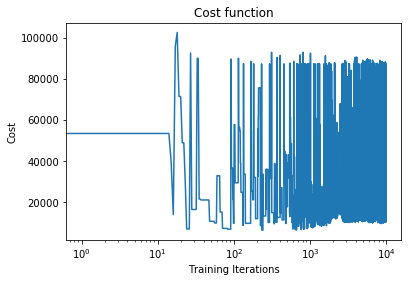

In [74]:
#Stochastic Gradient Descent
import sklearn.utils

trainingData, trainingLabels = sklearn.utils.shuffle(trainData, trainLabels)

w = np.zeros(12)
length = len(trainingData)

Costs = []
Accuracies = []

w = np.zeros(12)
for i in range(10000):
    s = get_s(w, trainingData)
    w = w + epsilon*(-2*lamb*w + (trainingLabels[i%length] - scipy.special.expit(trainingData[i%length].dot(w)))*(trainingData[i%length]))
    Costs.append(Cost(trainData, trainLabels, w, lamb))
        
plt.plot(Costs)
plt.title("Cost function")
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.xscale('log')
plt.show()

#plt.plot(training_sizes, Accuracies)
#plt.title("Accuracies")
#plt.xlabel('Training Iterations')
#plt.ylabel('Validation Accuracy')
#plt.xscale('log')
#plt.show()


In [6]:
#Hyper-param tuning
sizes = [.0000001, .000001, .00001, .0001, .001, .01, .1, 1, 10]
for i in range(len(trainData)):
    trainData[i] = trainData[i]/np.linalg.norm(trainData[i])
maxAcc = 0
maxLamb = 0
maxEps = 0
for i in sizes:
    for j in sizes:
        w = Train(10000, i, j, trainData, trainLabels)
        acc = Score(testData, testLabels, w)
        if acc > maxAcc:
            maxAcc = acc
            maxLamb = j
            maxEps = i
print(maxAcc, maxLamb, maxEps)

C:\Users\mveri\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: RuntimeWarning: overflow encountered in multiply
C:\Users\mveri\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: RuntimeWarning: invalid value encountered in add


0.947 0.01 0.01


In [68]:
import sklearn.utils

epsilon = .01
lamb = .00001
data = scipy.io.loadmat("hw4_wine_dist/data.mat")['X']
Y = scipy.io.loadmat("hw4_wine_dist/data.mat")['y']

for i in range(len(data)):
    data[i] = data[i]/np.linalg.norm(data[i])
data, Y = sklearn.utils.shuffle(data, Y)
newY = np.zeros(6000)
for i in range(6000):
    newY[i] = Y[i]
    
w = Train(50000, epsilon, lamb, data, newY)

testData = scipy.io.loadmat("hw4_wine_dist/data.mat")['X_test']
for i in range(len(testData)):
    testData[i] = testData[i]/np.linalg.norm(testData[i])
out = open('wine_output.csv', "w")
out.write("ID,Category\n")
for i in range(len(testData)):
    out.write("%d,%d\n" % (i, classify(testData[i], w)))
out.close() 

print(Score(data, Y, w))

0.9595


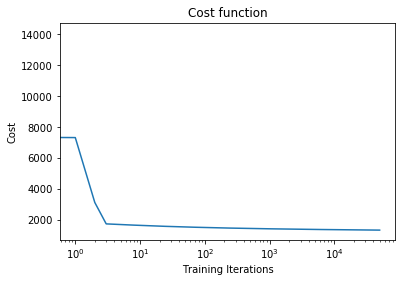

In [75]:
data = scipy.io.loadmat("hw4_wine_dist/data.mat")['X']
y = scipy.io.loadmat("hw4_wine_dist/data.mat")['y']
data, y = sklearn.utils.shuffle(data, y)
for i in range(len(data)):
    data[i] = data[i]/np.linalg.norm(data[i])
trainData = data[1000:]
testData = data[:1000]
trainLabels = y[1000:]
testLabels = y[:1000]
newY = np.zeros(5000)
for i in range(5000):
    newY[i] = trainLabels[i]
trainLabels = newY


#Decaying learning rate
Costs = []
def TrainDecay(iterations, epsilon, lamb, data, labels):
    w = np.zeros(12)
    for i in range(iterations):
        s = get_s(w, data)
        w = w + (epsilon/(i+1))*(data.T.dot(labels - s) - 2*lamb*w)
        Costs.append(Cost(trainData, trainLabels, w, lamb))
    return w, Costs
 
w, Costs = TrainDecay(50000, .01, .00001, trainData, trainLabels)

plt.plot(Costs)
plt.title("Cost function")
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.xscale('log')
plt.show()

Decaying learning rate seemed to give better results with respect to Cost than constant learning rate.

# Problem 5


The problem with his feature is that it measures time after midnight when it should be measuring time from midnight. The observation that spam peaks around midnight should mean that both emails sent just before midnight and emails sent right after midnight should be similar, where his measurement shows them as very far apart. A fix to this would be either modifying the feature to show absolute time from midnight, i.e. min(time, 24hours - time). Another thing that might be a flaw is measuring time in milliseconds might be too specific for the amount of data, and using seconds or minutes could help the model see the patterns.